In [136]:
#Librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import seaborn as sns
import datetime
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import tensorflow as tf
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [5]:
filesNames = ['2019_11_Q1','2019_11_Q2','2020_03_Q1',"2020_03_Q2",'2020_04_Q1','2020_04_Q2','2020_05_Q1']

In [137]:
df = pd.read_csv('2019_11_Q1.csv',header=0,encoding='UTF-8')
df.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,BAJANTRASERA
0,132275452,S,5843,4004,01/11/2019 00:00:54,6.166865,-75.642921,0,0,0,1
1,132275452,S,5843,4004,01/11/2019 00:03:12,6.167697,-75.648842,0,0,1,0
2,132275452,S,5843,4004,01/11/2019 00:04:56,6.173065,-75.649002,0,0,1,1
3,132275452,S,5843,4004,01/11/2019 00:04:57,6.173065,-75.649002,0,0,1,0
4,132275452,S,5843,4004,01/11/2019 00:05:16,6.173486,-75.649132,0,0,1,1


In [138]:
df.shape

(5868296, 11)

In [139]:
vehiculos = pd.read_csv('vehiculos.csv',header=0,engine='python')
vehiculos.head()

,IDVEHICULO,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA
0,770,TPX836,2007,50,20,30,10,COOTRASANA,1
1,774,TSF343,2008,55,22,33,10,COOTRASANA,1
2,775,TSZ407,2013,51,20,31,10,COOTRASANA,1
3,776,TSZ840,2013,50,20,30,10,COOTRASANA,1
4,777,TTN345,2014,37,15,22,10,COOTRASANA,1


Capacidad máxima de cada bus

# Desde aquí

In [140]:
proveedores = pd.read_excel('proveedores.xlsx',header=0,sheet_name='Hoja1')
proveedores.head()

,NOMBRES,PROVEEDOR TECNOLÓGICO,Sistema
0,ARRIERITAS,Sonar AVL,AMVA
1,AUTOMOVILES ITAGUI,Sonar AVL,AMVA
2,BARBOSA PORCESITO,Distracker,AMVA
3,BELLANITA,Skytracking,AMVA
4,COMBUSES,Optocontrol,AMVA


In [141]:
data2 = df.merge(vehiculos, on = 'IDVEHICULO', how='left')
data = data2.merge(proveedores, on = 'NOMBRES', how='left')
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA,PROVEEDOR TECNOLÓGICO,Sistema
0,132275452,S,5843,4004,01/11/2019 00:00:54,6.166865,-75.642921,0,0,0,...,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0,Sonar AVL,AMVA
1,132275452,S,5843,4004,01/11/2019 00:03:12,6.167697,-75.648842,0,0,1,...,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0,Sonar AVL,AMVA
2,132275452,S,5843,4004,01/11/2019 00:04:56,6.173065,-75.649002,0,0,1,...,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0,Sonar AVL,AMVA
3,132275452,S,5843,4004,01/11/2019 00:04:57,6.173065,-75.649002,0,0,1,...,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0,Sonar AVL,AMVA
4,132275452,S,5843,4004,01/11/2019 00:05:16,6.173486,-75.649132,0,0,1,...,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0,Sonar AVL,AMVA


In [142]:
data.columns

Index(['SECUENCIARECORRIDO', 'RECORRIDOFINALIZADO', 'IDVEHICULO', 'CODIGORUTA',
       'FECHAREGISTRO', 'LATITUD', 'LONGITUD', 'SUBENDELANTERA',
       'SUBENTRASERA', 'BAJANDELANTERA', 'BAJANTRASERA', 'PLACAVEHICULO',
       'MODELO', 'CAPPASAJEROS', 'CAPPASAJEROSPIE', 'CAPPASAJEROSSENTADOS',
       'IDEMPRESA', 'NOMBRES', 'IDENTIDADOPERA', 'PROVEEDOR TECNOLÓGICO',
       'Sistema'],
      dtype='object')

In [143]:
# data = data.drop(['PLACAVEHICULO','MODELO','IDEMPRESA','IDENTIDADOPERA'],axis=1)
# data.head()

In [144]:
#GENERAR COLUMNAS DE TRABAJO

#Cambio del formato de las fechas
data['FECHAREGISTRO'] = pd.to_datetime(data['FECHAREGISTRO'], format='%d/%m/%Y %H:%M:%S')
#Columna que representa el dia de la semana. Sirve para diferenciar entre dia habil y fin de semana
data["dia"]=data['FECHAREGISTRO'].dt.dayofweek
data["hora"]=data['FECHAREGISTRO'].dt.hour
#Función para asignar la franja del día
# def franja(i):
#     pico_mañana_min = 5
#     pico_mañana_max = 7
#     pico_tarde_min = 14
#     pico_tarde_max = 19
    
#     if pico_mañana_min<i.hour<pico_mañana_max:
#         return "1_peak"
#     elif pico_tarde_min<i.hour<pico_tarde_max:
#         return "2_peak"
#     else:
#         return "Off_peak"
# #Columna con la franja del dia
# data["franja"]=data['FECHAREGISTRO'].apply(franja)
# data.head()

In [145]:
#Función para calcular la carga
def carga(df):
    df.sort_values(by = ["SECUENCIARECORRIDO","FECHAREGISTRO"],inplace=True,ascending=True)
    df['FECHAREGISTRO_d'] = df['FECHAREGISTRO'].dt.day
    df['FECHAREGISTRO_m'] = df['FECHAREGISTRO'].dt.month
    df['delta_q'] = df['SUBENDELANTERA']+df['SUBENTRASERA']-df['BAJANDELANTERA']-df['BAJANTRASERA']
    df["carga"] = df.groupby(["SECUENCIARECORRIDO",'FECHAREGISTRO_d'])["delta_q"].cumsum()
    print("The distribution of passenger load before cleaning is:")
    print(round(df["carga"].quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]),2))

In [146]:
carga(data)

The distribution of passenger load before cleaning is:
0.01   -324.0
0.05    -33.0
0.10    -13.0
0.20     -1.0
0.30      3.0
0.40      7.0
0.50     12.0
0.60     17.0
0.70     23.0
0.80     32.0
0.90     46.0
0.95     62.0
0.99    108.0
Name: carga, dtype: float64


In [147]:
#Balance por secuenciarecorrido
def bal_secrec(data):
    # Ingresa uno de los archivos de consulta, devuelve un archivo resumen por cada secuencia recorrido
    # Agrega la columna delta que es el total de pasajeros que suben al viaje menos los que se bajaron
    # Adicionalmente imprime la distribución de la variable delta
    aggreg={'SUBENDELANTERA':"sum",'SUBENTRASERA':"sum", 
            'BAJANDELANTERA':"sum",'BAJANTRASERA':"sum", 
            'IDVEHICULO':"count",'FECHAREGISTRO': ['min', 'max']}
    data2=data.groupby("SECUENCIARECORRIDO").agg(aggreg)
    data2.reset_index(inplace=True)
    data2.rename(columns={'IDVEHICULO':"n"},inplace=True)
    data2["delta"]=data2['SUBENDELANTERA']+data2['SUBENTRASERA']-data2['BAJANDELANTERA']-data2['BAJANTRASERA']
    return data2

    print("Percentiles del delta entre entradas y salidas por viaje")
    print(round(data2["delta"].quantile([0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99]),2))


In [148]:
bal_secrec(data)

SECUENCIARECORRIDO SUBENDELANTERA SUBENTRASERA BAJANDELANTERA  \
                                     sum          sum            sum   
0               125846357              0            0              0   
1               126042690          17440         5129           1350   
2               132275452              0            0              4   
3               132282445              9            5              0   
4               132283696              0            4              0   
5               132289052              0            3              0   
6               132305970              0            1              0   
7               132307092              0            2              0   
8               132308757              0            0              0   
9               132310925              2            0              2   
10              132322511              1            0              1   
11              132329568              0            0              0   
12              132330738              0            0              0   
13              132331724              0            1              0   
14              132331835              0            1              2   
15              132333154              0            1              0   
16              132334229              0            0              0   
17              132334540              1            0              2   
18              132336702              2            0              2   
19              132336789              0            0              1   
20              132337357              1            0              0   
21              132337592              0            8              0   
22              132337699              0            1              0   
23              132337961              2            0              1   
24              132338468              1            0              0   
25              132338948             16            0              8   
26              132340088             38            0              7   
27              132340357              0            2              0   
28              132340692              0            1              0   
29              132341663              0            0              1   
...                   ...            ...          ...            ...   
116959          145073211            106           12             31   
116960          145073438             61            2             12   
116961          145073851             45            0              3   
116962          145074491             59            0              5   
116963          145074702             41            0              8   
116964          145074843             28            3              2   
116965          145077280             55            1             11   
116966          145077669             70            2             20   
116967          145079717            110           19             28   
116968          145080051             57            2             10   
116969          145080825             42            1             13   
116970          145275273             53            0             18   
116971          145276101             30            0             24   
116972          145277086             76            0             26   
116973          145278031             40            0             16   
116974          145281708            174            4             85   
116975          145334852             27            3              0   
116976          145335674             52            3              0   
116977          145337040             39           10              1   
116978          145337537             19            9              1   
116979          145338123             40            8              4   
116980          145338589             14           19              2   
116981          145339302            105       

In [149]:
#funcion para graficar los histogramas de los flujos de entrada y salida en escala logaritimica.
def hist_flujos(df):
    Fig2 = plt.figure(figsize = (10,10))
    filesNames=['ISUBENDELANTERA','ISUBENTRASERA', 'IBAJANDELANTERA', 'IBAJANTRASERA']
    for index,file in zip(range(len(filesNames)),filesNames):
        fig = Fig2.add_subplot(2,2,index+1)
        df[file].hist()
        fig.set_yscale('log')
        fig.set_title(file)
        
# hist_flujos(data)

# Identificando valores sin sentido en carga

In [150]:
data.loc[data['carga'] < 0,'Cumple_capacidad'] = 'Negative values'
data.loc[data['carga'] > 1.15*data['CAPPASAJEROS'],'Cumple_capacidad'] = 'Exceeded capacity'
data.loc[(data['carga'] > -1) & (data['carga'] < 1.15*data['CAPPASAJEROS']),'Cumple_capacidad'] = 'Normal values'

Text(0.5,1,'Distibution of reported charges')

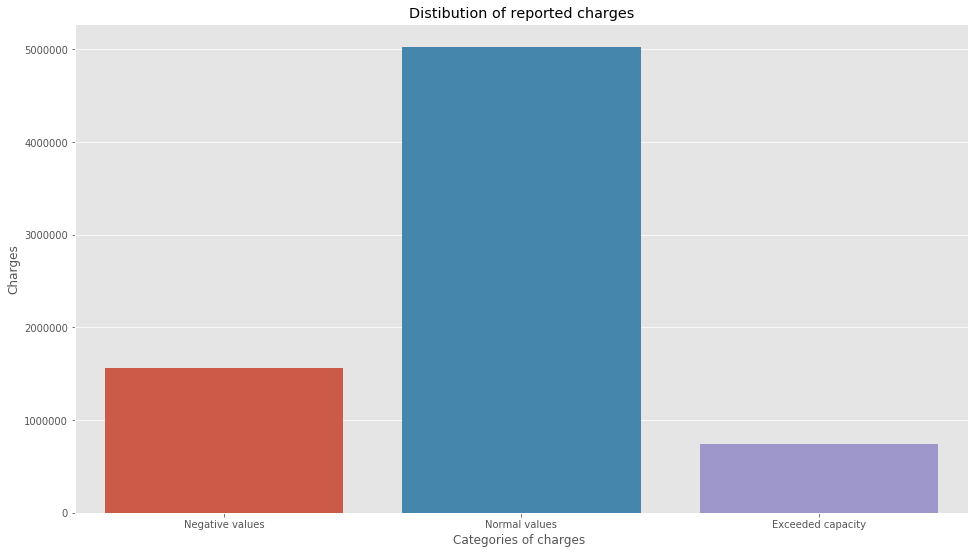

In [151]:
fig = sns.countplot(x="Cumple_capacidad", data=data)
plt.xlabel("Categories of charges ")
plt.ylabel("Charges")
plt.title("Distibution of reported charges") 
# fig.savefig('nos.png')

# Impuntando valores de carga negativa

In [152]:
data.shape

(7385803, 28)

In [153]:
mean_value = int(data['carga'].mean())

In [154]:
data['carga2'] = np.where(data['Cumple_capacidad'] == 'Negative values',mean_value, np.where(data['Cumple_capacidad'] == 'Exceeded capacity',data['CAPPASAJEROS'], data['carga']))
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,PROVEEDOR TECNOLÓGICO,Sistema,dia,hora,FECHAREGISTRO_d,FECHAREGISTRO_m,delta_q,carga,Cumple_capacidad,carga2
7354919,125846357,S,6237,99060,2019-11-14 11:08:01,6.088238,-75.634615,0,0,0,...,NaN,NaN,3,11,14,11,-1,-1,Negative values,6.0
2598255,126042690,N,6229,9106,2019-11-03 04:55:59,6.058311,-75.630035,4,0,1,...,NaN,NaN,6,4,3,11,3,3,Normal values,3.0
2598256,126042690,N,6229,9106,2019-11-03 04:56:04,6.058311,-75.630035,4,0,1,...,NaN,NaN,6,4,3,11,2,5,Normal values,5.0
2598348,126042690,N,6229,9106,2019-11-03 04:56:44,6.058311,-75.630035,4,0,1,...,NaN,NaN,6,4,3,11,0,5,Normal values,5.0
2598349,126042690,N,6229,9106,2019-11-03 05:17:00,6.058311,-75.630035,12,0,2,...,NaN,NaN,6,5,3,11,7,12,Normal values,12.0


# Porcentaje cargas negativas por empresa

In [155]:
empresas.head()

NameError: name 'empresas' is not defined

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
nombres = list(data.loc[data['Cumple_capacidad']=='Negative values','NOMBRES'].unique())
empresas = pd.DataFrame(data[data['Cumple_capacidad']=='Negative values']['NOMBRES'].value_counts()/data[data['NOMBRES'].isin(nombres)]['NOMBRES'].value_counts()).reset_index()
empresas = empresas.rename(columns={"index": "Company", "NOMBRES": "Percentage"}).sort_values(by='Percentage' , ascending=False)
empresas['Percentage'] = 100*empresas['Percentage']
ax = sns.barplot(x = 'Company', y = 'Percentage', data = empresas)
ax.set(xlabel='Companies', ylabel='Percentage of negative reports')
plt.xticks(rotation=90)
plt.show()

# Porcentaje cargas negativas por proveedor tecnológico

In [ ]:
nombres = data.loc[data['Cumple_capacidad']=='Negative values','PROVEEDOR TECNOLÓGICO'].unique()
empresas = pd.DataFrame(data[data['Cumple_capacidad']=='Negative values']['PROVEEDOR TECNOLÓGICO'].value_counts()/data[data['PROVEEDOR TECNOLÓGICO'].isin(nombres)]['PROVEEDOR TECNOLÓGICO'].value_counts()).reset_index()
empresas = empresas.rename(columns={"index": "provider", "PROVEEDOR TECNOLÓGICO": "Percentage"}).sort_values(by='Percentage' , ascending=False)
empresas['Percentage'] = 100*empresas['Percentage']
ax = sns.barplot(x = 'provider', y = 'Percentage', data = empresas)
ax.set(xlabel='Technology provider', ylabel='Percentage of negative reports')
plt.xticks(rotation=90)
plt.show()

# Tamaño de la operación por empresa

In [ ]:
# sns.set(rc={'figure.figsize':(10,5)})
# data_aux = data[data['NOMBRES'].isin(nombres)][['NOMBRES','carga2']].groupby('NOMBRES').sum().reset_index().sort_values('carga2',ascending=False)
# ax = sns.barplot(x='NOMBRES', y='carga2', data=data_aux)
# ax.set_xticklabels(rotation=90, labels=data_aux['NOMBRES'])
# data_aux

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
data_aux = pd.DataFrame(data['NOMBRES'].value_counts()).reset_index()
data_aux.rename(columns={"index": "EMPRESA", "NOMBRES": "total"}, inplace=True)
ax= sns.barplot(x='EMPRESA', y='total', data=data_aux)
ax.set(xlabel='Companies', ylabel='Size of operation')
plt.xticks(rotation=90)
plt.show()

# Tamaño de la operación por proveedor tecnológico

In [ ]:
# sns.set(rc={'figure.figsize':(10,5)})
data_aux = pd.DataFrame(data['PROVEEDOR TECNOLÓGICO'].value_counts()).reset_index()
data_aux.rename(columns={"index": "EMPRESA", "PROVEEDOR TECNOLÓGICO": "total"}, inplace=True)
data_aux.head()
ax= sns.barplot(x='EMPRESA', y='total', data=data_aux)
ax.set(xlabel='Companies', ylabel='Size of operation')
plt.xticks(rotation=90)
plt.show()

# carga por hora

In [ ]:
# fig = .plot()
# fig.subtitle('Distribution of charges acroos hours of the day', fontsize=20)
# plt.xlabel('Hours of the day', fontsize=18)
# plt.ylabel('charge', fontsize=16)

fig = plt.figure()
plt.plot(data.groupby(data['FECHAREGISTRO'].dt.hour)['carga2'].sum())
fig.suptitle('Distribution of charges acroos hours of the day', fontsize=20)
plt.xlabel('Hours of the day', fontsize=18)
plt.ylabel('charge', fontsize=16)
fig.savefig('horas.png')


# carga por día

In [ ]:
fig = plt.figure()
plt.plot(data.groupby(data['FECHAREGISTRO'].dt.day)['carga2'].sum())
fig.suptitle('Distribution of charges acroos first half of november 2019', fontsize=20)
plt.xlabel('Day of the month', fontsize=18)
plt.ylabel('charge', fontsize=16)
fig.savefig('dias.png')

# Porcentaje de reportes negativos por ruta

In [ ]:
rutas = list(data.loc[data['Cumple_capacidad']=='no_neg','CODIGORUTA'].unique())
rutas2 = 100*data[data['Cumple_capacidad']=='no_neg']['CODIGORUTA'].value_counts()/data[data['CODIGORUTA'].isin(rutas)]['CODIGORUTA'].value_counts()
rutas2.sort_values(ascending=False).plot('bar', figsize=(15,8))

In [ ]:
rutas2 = data[data['Cumple_capacidad']=='no_neg']['CODIGORUTA'].value_counts()/data[data['CODIGORUTA'].isin(rutas)]['CODIGORUTA'].value_counts()
rutas2.head()

In [ ]:
rutas3 = pd.DataFrame(rutas2).reset_index()
rutas3.rename(columns={"index": "CODIGORUTA", "CODIGORUTA": "porcentaje_neg"}, inplace=True)
rutas3.head()

In [ ]:
dados = rutas3.merge(data[['CODIGORUTA','NOMBRES']], on='CODIGORUTA', how='left').groupby(['CODIGORUTA','NOMBRES']).mean().reset_index().groupby('NOMBRES').mean().reset_index().drop('CODIGORUTA',axis=1).sort_values('porcentaje_neg',ascending=False)
# dados
ax = sns.barplot(x='NOMBRES',y='porcentaje_neg', data=dados)
ax.set_xticklabels(rotation=90, labels=data_aux['NOMBRES'])

In [ ]:
data_prueba.columns

# Porcentajes de reportes negativos en carga por vehículo

In [ ]:
negativos = data[(data['NOMBRES'] == 'BELLANITA') & (data['Cumple_capacidad'] == 'no_neg')][['IDVEHICULO','carga']].groupby("IDVEHICULO").count().reset_index()
total =  data[(data['NOMBRES'] == 'BELLANITA')][['IDVEHICULO','carga']].groupby("IDVEHICULO").count().reset_index()
negativos = negativos.merge(total, on='IDVEHICULO', how='left')
negativos["porcentaje"]= 100*(negativos["carga_x"]/negativos["carga_y"])
negativos.head()

# Porcentajes de reportes negativos en carga por vehículo y por empresa

In [ ]:
negativos = data[data['Cumple_capacidad'] == 'no_neg'][['NOMBRES','IDVEHICULO','carga']].groupby(['NOMBRES','IDVEHICULO']).count().reset_index()
total =  data[['NOMBRES','IDVEHICULO','carga']].groupby(['NOMBRES','IDVEHICULO']).count().reset_index()
negativos = negativos.merge(total, on=['IDVEHICULO','NOMBRES'], how='left')
negativos["porcentaje"]= 100*(negativos["carga_x"]/negativos["carga_y"])
final = negativos.sort_values("porcentaje",ascending=False)
final.head()

# Modelos de Pronóstico

In [156]:
data = pd.read_csv('2019_11_Q1_arc.csv',header=0,encoding='UTF-8')
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,BAJANTRASERA,nuevas coordenadas,arc
0,132275452,S,5843,4004,01/11/2019 00:00:54,6.167530,-75.643637,0,0,0,1,"(6.167529684802798, -75.6436365548203)",4584-4820
1,132275452,S,5843,4004,01/11/2019 00:03:12,6.167645,-75.648818,0,0,1,0,"(6.167645131857714, -75.64881807355334)",2056-5498
2,132275452,S,5843,4004,01/11/2019 00:04:56,6.172989,-75.649019,0,0,1,1,"(6.172988769656983, -75.6490190378299)",3183-5506
3,132275452,S,5843,4004,01/11/2019 00:04:57,6.172989,-75.649019,0,0,1,0,"(6.172988769656983, -75.6490190378299)",3183-5506
4,132275452,S,5843,4004,01/11/2019 00:05:16,6.173515,-75.649180,0,0,1,1,"(6.173515468785558, -75.64917973830612)",3183-5506


In [157]:
vehiculos = pd.read_csv('vehiculos.csv',header=0,engine='python')
vehiculos.head()

,IDVEHICULO,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA
0,770,TPX836,2007,50,20,30,10,COOTRASANA,1
1,774,TSF343,2008,55,22,33,10,COOTRASANA,1
2,775,TSZ407,2013,51,20,31,10,COOTRASANA,1
3,776,TSZ840,2013,50,20,30,10,COOTRASANA,1
4,777,TTN345,2014,37,15,22,10,COOTRASANA,1


In [158]:
data2 = data.merge(vehiculos, on = 'IDVEHICULO', how='left')
data2.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,nuevas coordenadas,arc,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA
0,132275452,S,5843,4004,01/11/2019 00:00:54,6.167530,-75.643637,0,0,0,...,"(6.167529684802798, -75.6436365548203)",4584-4820,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0
1,132275452,S,5843,4004,01/11/2019 00:03:12,6.167645,-75.648818,0,0,1,...,"(6.167645131857714, -75.64881807355334)",2056-5498,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0
2,132275452,S,5843,4004,01/11/2019 00:04:56,6.172989,-75.649019,0,0,1,...,"(6.172988769656983, -75.6490190378299)",3183-5506,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0
3,132275452,S,5843,4004,01/11/2019 00:04:57,6.172989,-75.649019,0,0,1,...,"(6.172988769656983, -75.6490190378299)",3183-5506,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0
4,132275452,S,5843,4004,01/11/2019 00:05:16,6.173515,-75.649180,0,0,1,...,"(6.173515468785558, -75.64917973830612)",3183-5506,STC170,2016.0,55.0,22.0,33.0,53.0,SOLO BUS,1.0


In [159]:
data = data2.head(1000)

In [22]:
#Cambio del formato de las fechas
data['FECHAREGISTRO'] = pd.to_datetime(data['FECHAREGISTRO'], format='%d/%m/%Y %H:%M:%S')
#Columna que representa el dia de la semana. Sirve para diferenciar entre dia habil y fin de semana
data["dia"]=data['FECHAREGISTRO'].dt.dayofweek
data["hora"]=data['FECHAREGISTRO'].dt.hour
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,carga,Cumple_capacidad,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA
0,132275452,S,5843,4004,2019-11-01 00:00:54,6.167530,-75.643637,0,0,0,...,-1,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
1,132275452,S,5843,4004,2019-11-01 00:03:12,6.167645,-75.648818,0,0,1,...,-2,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
2,132275452,S,5843,4004,2019-11-01 00:04:56,6.172989,-75.649019,0,0,1,...,-4,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
3,132275452,S,5843,4004,2019-11-01 00:04:57,6.172989,-75.649019,0,0,1,...,-5,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
4,132275452,S,5843,4004,2019-11-01 00:05:16,6.173515,-75.649180,0,0,1,...,-7,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1


In [23]:
data['dia'].unique()

array([4])

In [24]:
def carga(df):
    df.sort_values(by = ["SECUENCIARECORRIDO","FECHAREGISTRO"],inplace=True,ascending=True)
    df['FECHAREGISTRO_d'] = df['FECHAREGISTRO'].dt.day
    df['FECHAREGISTRO_m'] = df['FECHAREGISTRO'].dt.month
    df['delta_q'] = df['SUBENDELANTERA']+df['SUBENTRASERA']-df['BAJANDELANTERA']-df['BAJANTRASERA']
    df["carga"] = df.groupby(["SECUENCIARECORRIDO",'FECHAREGISTRO_d'])["delta_q"].cumsum()
    print("The distribution of passenger load before cleaning is:")
    print(round(df["carga"].quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]),2))

In [25]:
carga(data)

The distribution of passenger load before cleaning is:
0.01   -32.02
0.05   -14.00
0.10    -7.00
0.20    -1.00
0.30     1.00
0.40     2.00
0.50     5.00
0.60     8.00
0.70    12.00
0.80    15.00
0.90    21.00
0.95    25.00
0.99    32.01
Name: carga, dtype: float64


In [26]:
data.loc[data['carga'] < 0,'Cumple_capacidad'] = 'Negative values'
data.loc[data['carga'] > 1.15*data['CAPPASAJEROS'],'Cumple_capacidad'] = 'Exceeded capacity'
data.loc[(data['carga'] > -1) & (data['carga'] < 1.15*data['CAPPASAJEROS']),'Cumple_capacidad'] = 'Normal values'
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,carga,Cumple_capacidad,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA
0,132275452,S,5843,4004,2019-11-01 00:00:54,6.167530,-75.643637,0,0,0,...,-1,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
1,132275452,S,5843,4004,2019-11-01 00:03:12,6.167645,-75.648818,0,0,1,...,-2,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
2,132275452,S,5843,4004,2019-11-01 00:04:56,6.172989,-75.649019,0,0,1,...,-4,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
3,132275452,S,5843,4004,2019-11-01 00:04:57,6.172989,-75.649019,0,0,1,...,-5,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1
4,132275452,S,5843,4004,2019-11-01 00:05:16,6.173515,-75.649180,0,0,1,...,-7,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1


In [27]:
mean_value = int(data['carga'].mean())
data['carga2'] = np.where(data['Cumple_capacidad'] == 'Negative values',mean_value, np.where(data['Cumple_capacidad'] == 'Exceeded capacity',data['CAPPASAJEROS'], data['carga']))
data.head()

,SECUENCIARECORRIDO,RECORRIDOFINALIZADO,IDVEHICULO,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,...,Cumple_capacidad,PLACAVEHICULO,MODELO,CAPPASAJEROS,CAPPASAJEROSPIE,CAPPASAJEROSSENTADOS,IDEMPRESA,NOMBRES,IDENTIDADOPERA,carga2
0,132275452,S,5843,4004,2019-11-01 00:00:54,6.167530,-75.643637,0,0,0,...,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1,5
1,132275452,S,5843,4004,2019-11-01 00:03:12,6.167645,-75.648818,0,0,1,...,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1,5
2,132275452,S,5843,4004,2019-11-01 00:04:56,6.172989,-75.649019,0,0,1,...,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1,5
3,132275452,S,5843,4004,2019-11-01 00:04:57,6.172989,-75.649019,0,0,1,...,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1,5
4,132275452,S,5843,4004,2019-11-01 00:05:16,6.173515,-75.649180,0,0,1,...,Negative values,STC170,2016,55,22,33,53,SOLO BUS,1,5


In [28]:
data.columns

Index(['SECUENCIARECORRIDO', 'RECORRIDOFINALIZADO', 'IDVEHICULO', 'CODIGORUTA',
       'FECHAREGISTRO', 'LATITUD', 'LONGITUD', 'SUBENDELANTERA',
       'SUBENTRASERA', 'BAJANDELANTERA', 'BAJANTRASERA', 'nuevas coordenadas',
       'arc', 'PLACAVEHICULO_x', 'MODELO_x', 'CAPPASAJEROS_x',
       'CAPPASAJEROSPIE_x', 'CAPPASAJEROSSENTADOS_x', 'IDEMPRESA_x',
       'NOMBRES_x', 'IDENTIDADOPERA_x', 'PLACAVEHICULO_y', 'MODELO_y',
       'CAPPASAJEROS_y', 'CAPPASAJEROSPIE_y', 'CAPPASAJEROSSENTADOS_y',
       'IDEMPRESA_y', 'NOMBRES_y', 'IDENTIDADOPERA_y', 'dia', 'hora',
       'FECHAREGISTRO_d', 'FECHAREGISTRO_m', 'delta_q', 'carga',
       'Cumple_capacidad', 'PLACAVEHICULO', 'MODELO', 'CAPPASAJEROS',
       'CAPPASAJEROSPIE', 'CAPPASAJEROSSENTADOS', 'IDEMPRESA', 'NOMBRES',
       'IDENTIDADOPERA', 'carga2'],
      dtype='object')

In [29]:
# data_prueba = data.head(10000)

In [30]:
data['arc'].value_counts()

5000-5028    28
5519-5522    25
3795-7039    23
2888-6207    20
3802-5411    19
5293-5388    17
4530-5514    16
2010-3801    15
5413-5419    14
3860-5290    14
4717-5587    13
2351-3741    13
5004-5005    13
5070-5088    12
5659-5660    12
3772-3776    12
5386-5387    11
415-3257     11
3721-5288    11
4586-6281    11
3775-3827    10
5521-5931     9
5299-5363     9
5641-5645     9
3724-4799     9
3795-5290     9
3516-3794     8
3031-3801     8
5548-5549     8
5176-5177     8
             ..
3783-7020     1
3003-3795     1
3720-5288     1
4579-6293     1
5525-5922     1
2309-2312     1
2078-4491     1
5080-5082     1
4136-4137     1
5640-5922     1
2370-5048     1
4137-7075     1
2367-3415     1
2376-3421     1
4359-5479     1
3828-3829     1
3747-3815     1
101-2424      1
5524-5921     1
3825-3827     1
4485-5686     1
155-2557      1
5205-5206     1
3537-3539     1
7007-7032     1
3425-6530     1
3783-3784     1
2058-2062     1
3445-7070     1
457-4460      1
Name: arc, Length: 333, 

In [31]:
data = data[['arc','dia','hora', 'carga2']].groupby(['arc','dia','hora'])['carga2'].agg('sum').reset_index()
data.head()

,arc,dia,hora,carga2
0,10001-16006,4,4,115
1,10014-10015,4,4,14
2,101-2424,4,3,19
3,109-2451,4,3,33
4,155-2557,4,4,1


In [32]:
data.loc[data['carga2'] <= data['carga2'].quantile(0.33) ,'carga_total'] = 'Carga_baja'
data.loc[(data['carga2'] > data['carga2'].quantile(0.33)) & (data['carga2']<= data['carga2'].quantile(0.66)),'carga_total'] = 'Carga_media'
data.loc[data['carga2'] > data['carga2'].quantile(0.66),'carga_total'] = 'Carga_Alta'
data.head()

,arc,dia,hora,carga2,carga_total
0,10001-16006,4,4,115,Carga_Alta
1,10014-10015,4,4,14,Carga_media
2,101-2424,4,3,19,Carga_media
3,109-2451,4,3,33,Carga_Alta
4,155-2557,4,4,1,Carga_baja


# DESDE AQUÍ

In [123]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [124]:
X = data[['arc','dia','hora']]
y = data['carga_total']

X = pd.get_dummies(data=X, columns=['arc','dia', 'hora'])
# le = LabelEncoder() 
# # prueba['CODIGORUTA']= le.fit_transform(prueba['CODIGORUTA']) 
# # prueba['NOMBRES']= le.fit_transform(prueba['NOMBRES'].astype(str)) 
# y = pd.get_dummies(df.Countries, prefix='Country')
# X['arc']= le.fit_transform(X['arc'])
# X['dia']= le.fit_transform(X['dia'])
# X['hora']= le.fit_transform(X['hora'])
X.head()

,arc_10001-16006,arc_10014-10015,arc_101-2424,arc_109-2451,arc_155-2557,arc_155-2558,arc_2010-3801,arc_2023-4446,arc_2034-4761,arc_2043-3545,...,arc_7020-7021,arc_7029-7032,arc_76-2324,arc_95-3512,dia_4,hora_0,hora_1,hora_2,hora_3,hora_4
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [125]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = tf.keras.utils.to_categorical(encoded_Y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [127]:
# define baseline model
def baseline_model():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=len(X.columns), activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [128]:
estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=1000, verbose=0)

In [129]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 42.63% (9.54%)


In [130]:
X_test.shape

(101, 339)

In [131]:
baseline_model().fit(X, dummy_y,batch_size=1000, epochs=200, verbose=0)

In [133]:
baseline_model().predict_classes(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# HASTA AQUÍ

In [24]:
le = LabelEncoder() 
# prueba['CODIGORUTA']= le.fit_transform(prueba['CODIGORUTA']) 
# prueba['NOMBRES']= le.fit_transform(prueba['NOMBRES'].astype(str)) 
data['arc']= le.fit_transform(data['arc'])
data['dia']= le.fit_transform(data['dia'])
data['hora']= le.fit_transform(data['hora'])
data['carga_total']= le.fit_transform(data['carga_total'])
# prueba['franja']= le.fit_transform(prueba['franja'])
data.head()

,arc,dia,hora,carga2,carga_total
0,0,0,1,2.0,1
1,0,0,3,4.0,1
2,0,0,4,179.0,0
3,0,0,5,1302.0,0
4,0,0,6,641.0,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable, Independence,Autoregressive)
from statsmodels.genmod.families import Poisson



In [ ]:
fam = Poisson()
model1 = GEE.from_formula("carga2 ~ dia+IDEMPRESA +SECUENCIARECORRIDO", "franja", data = prueba, cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

In [ ]:
prueba.columns

In [25]:
X = data[['arc','dia','hora']]
y = data['carga_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [28]:
neurons = 128
model = keras.Sequential([layers.Dense(neurons, activation='relu', input_shape=[len(X_train_std.columns),]), # Input layer
                          layers.Dense(1)]) # Output layer

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model.compile(loss='mse', # This uses Mean-Squared Error (https://en.wikipedia.org/wiki/Mean_squared_error)
              optimizer = 'adam', # The algorithm to optimize, root means squared is useful for regression
             )


In [30]:
history = model.fit(X_train_std, y_train, epochs=100, validation_split = 0.2, verbose=1, batch_size=1056)

Train on 196550 samples, validate on 49138 samples
Epoch 1/100
196550/196550 [==============================] - 1s 7us/sample - loss: 0.7230 - val_loss: 0.6547
Epoch 2/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6556 - val_loss: 0.6498
Epoch 3/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6525 - val_loss: 0.6488
Epoch 4/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6515 - val_loss: 0.6484
Epoch 5/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6510 - val_loss: 0.6482
Epoch 6/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6505 - val_loss: 0.6475
Epoch 7/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6501 - val_loss: 0.6472
Epoch 8/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6497 - val_loss: 0.6476
Epoch 9/100
196550/196550 [==============================] - 1s 4us/sample - 

196550/196550 [==============================] - 1s 4us/sample - loss: 0.6439 - val_loss: 0.6430
Epoch 76/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6440 - val_loss: 0.6424
Epoch 77/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6439 - val_loss: 0.6423
Epoch 78/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6435 - val_loss: 0.6424
Epoch 79/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6437 - val_loss: 0.6430
Epoch 80/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6433 - val_loss: 0.6433
Epoch 81/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6432 - val_loss: 0.6421
Epoch 82/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6432 - val_loss: 0.6439
Epoch 83/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6431 - val_loss: 0.6419
Epoch 84/100
196550/196

In [31]:
X_test_std = scaler.transform(X_test)
math.sqrt(model.evaluate(X_test_std, y_test, batch_size=1056))

81896/81896 [==============================] - 0s 2us/sample - loss: 0.6399


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.7999636716380665

In [32]:
deep_model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=[len(X_train_std.columns),]),])
# deep_model.add(layers.Dense(64, activation='relu'))
deep_model.add(layers.Dense(1))
deep_model.compile(loss='mse', optimizer = 'adam')

In [33]:
history = deep_model.fit(X_train_std, y_train, epochs=100, validation_split=0.2, verbose=1, batch_size=1056)

Train on 196550 samples, validate on 49138 samples
Epoch 1/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.7202 - val_loss: 0.6556
Epoch 2/100
196550/196550 [==============================] - 1s 5us/sample - loss: 0.6561 - val_loss: 0.6503
Epoch 3/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6525 - val_loss: 0.6490
Epoch 4/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6516 - val_loss: 0.6480
Epoch 5/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6509 - val_loss: 0.6481
Epoch 6/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6504 - val_loss: 0.6478
Epoch 7/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6500 - val_loss: 0.6475
Epoch 8/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6498 - val_loss: 0.6470
Epoch 9/100
196550/196550 [==============================] - 1s 4us/sample - 

196550/196550 [==============================] - 1s 4us/sample - loss: 0.6452 - val_loss: 0.6434
Epoch 76/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6448 - val_loss: 0.6433
Epoch 77/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6450 - val_loss: 0.6439
Epoch 78/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6450 - val_loss: 0.6442
Epoch 79/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6449 - val_loss: 0.6431
Epoch 80/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6448 - val_loss: 0.6436
Epoch 81/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6448 - val_loss: 0.6433
Epoch 82/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6448 - val_loss: 0.6448
Epoch 83/100
196550/196550 [==============================] - 1s 4us/sample - loss: 0.6450 - val_loss: 0.6440
Epoch 84/100
196550/196

In [34]:
math.sqrt(deep_model.evaluate(X_test_std, y_test, batch_size=1056))

81896/81896 [==============================] - 0s 2us/sample - loss: 0.6440


0.8024875864704605

In [ ]:
X_test_std = scaler.transform(X_test)
deep_model.predict(X_test_std)

In [ ]:
df.head()

In [35]:
data.head()

,arc,dia,hora,carga2,carga_total
0,0,0,1,2.0,1
1,0,0,3,4.0,1
2,0,0,4,179.0,0
3,0,0,5,1302.0,0
4,0,0,6,641.0,0


In [44]:
deep_model.predict(scaler.transform([[10001-16006, 6,7]]))

array([[1.3227628]], dtype=float32)

In [ ]:
!pip install tensorflow

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [7]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize first few examples
for i in range(10):
    print(X[i], y[i])

(1000, 10) (1000, 3)
[ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.] [1 1 0]
[7. 6. 4. 4. 6. 8. 3. 4. 6. 4.] [0 0 0]
[ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.] [1 1 0]
[1. 1. 5. 5. 7. 3. 4. 6. 4. 4.] [1 1 1]
[ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.] [0 1 0]
[ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.] [0 0 0]
[ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.] [0 1 0]
[ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.] [1 1 1]
[ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.] [1 1 1]
[ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.] [1 1 1]


In [10]:
model = tf.keras.Sequential()
model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

NameError: name 'Dense' is not defined

ModuleNotFoundError: No module named 'keras'

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 14 14:23:39 2020

"""

import pandas as pd
import psycopg2 as psc
import pandas.io.sql as sql
import json
import datetime as dt
import sklearn as skt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


In [4]:
conn = psc.connect(user = 'team75',
                   password = '*VamosPorLaFoto*',
                   host = 'amvappdb.cqxpk4qplvq9.us-east-2.rds.amazonaws.com',  
                   port = 5432,
                   database = 'postgres')

In [ ]:



consulta = pd.read_sql('SELECT * FROM CONSULTA', conn)
arco = pd.read_sql('SELECT * FROM ARCOS', conn)

data = consulta.merge(arco,on ='arco', how='left')
data['log_carga'] = np.log(data['carga'] +1) 


data.loc[data['log_carga'] <= data['log_carga'].quantile(0.2) ,'cluster'] = 'baja'
data.loc[(data['log_carga'] > data['log_carga'].quantile(0.2)) & (data['log_carga']<= data['log_carga'].quantile(0.4)),'cluster'] = 'media_baja'
data.loc[(data['log_carga'] > data['log_carga'].quantile(0.4)) & (data['log_carga']<= data['log_carga'].quantile(0.6)),'cluster'] = 'media'
data.loc[(data['log_carga'] > data['log_carga'].quantile(0.6)) & (data['log_carga']<= data['log_carga'].quantile(0.8)),'cluster'] = 'media_alta'
data.loc[data['log_carga'] > data['log_carga'].quantile(0.8),'cluster'] = 'alta'

y = data['cluster']
x = data[['latitud','longitud', 'dia', 'hora']]
x = pd.get_dummies(x, columns=['dia','hora'])



In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = tf.keras.utils.to_categorical(y)


x_train, x_test, y_train, y_test = train_test_split(x, y)

K.clear_session()
tf.keras.backend.set_floatx('float64')
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(30, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='tanh'))
model.add(tf.keras.layers.Dense(15, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs = 20)








